In [163]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
df=pd.read_csv('train_credit.csv')

In [165]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [166]:
df.drop(columns=['ID','Customer_ID','SSN','Name'],inplace=True)

In [167]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [170]:
df.Credit_Score.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [171]:
cont=[]

In [172]:

for i in df.columns:
    if (df[i].dtype=='int64' or df[i].dtype=='float64') :
        cont.append(i)

In [173]:
cont

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [174]:
for i in cont:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR=Q3-Q1
    low_lim=Q1-(1.5*IQR)
    up_lim=Q3+(1.5*IQR)
    df = df[(df[i]>low_lim) & (df[i] < up_lim)]


In [175]:
df.shape

(72247, 24)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72247 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     72247 non-null  int64  
 1   Age                       72247 non-null  float64
 2   Occupation                72247 non-null  object 
 3   Annual_Income             72247 non-null  float64
 4   Monthly_Inhand_Salary     72247 non-null  float64
 5   Num_Bank_Accounts         72247 non-null  float64
 6   Num_Credit_Card           72247 non-null  float64
 7   Interest_Rate             72247 non-null  float64
 8   Num_of_Loan               72247 non-null  float64
 9   Type_of_Loan              72247 non-null  object 
 10  Delay_from_due_date       72247 non-null  float64
 11  Num_of_Delayed_Payment    72247 non-null  float64
 12  Changed_Credit_Limit      72247 non-null  float64
 13  Num_Credit_Inquiries      72247 non-null  float64
 14  Credit_Mix 

In [177]:
cont

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [178]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,72247.0,4.470483,2.290730,1.000000,2.000000,4.000000,6.000000,8.000000
Age,72247.0,33.580342,10.840688,14.000000,25.000000,33.000000,42.000000,56.000000
Annual_Income,72247.0,40014.448191,27093.595042,7005.930000,18550.400000,32755.490000,57196.560000,145932.040000
Monthly_Inhand_Salary,72247.0,3331.397352,2260.598422,332.128333,1557.437500,2728.545000,4722.730000,12034.433333
Num_Bank_Accounts,72247.0,5.184492,2.493487,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,72247.0,5.346921,1.971318,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,72247.0,13.726272,8.288298,1.000000,7.000000,12.000000,19.000000,34.000000
Num_of_Loan,72247.0,3.226528,2.191130,0.000000,2.000000,3.000000,4.000000,9.000000
Delay_from_due_date,72247.0,18.662422,12.039255,0.000000,9.000000,17.000000,26.000000,54.000000
Num_of_Delayed_Payment,72247.0,12.863662,5.943061,0.000000,9.000000,13.000000,17.000000,25.000000


<AxesSubplot:xlabel='Credit_Score', ylabel='Annual_Income'>

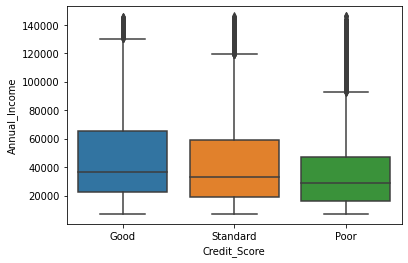

In [179]:
sns.boxplot(x='Credit_Score',y='Annual_Income',data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

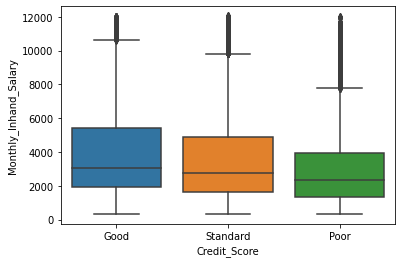

In [180]:
sns.boxplot(x='Credit_Score',y='Monthly_Inhand_Salary',data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

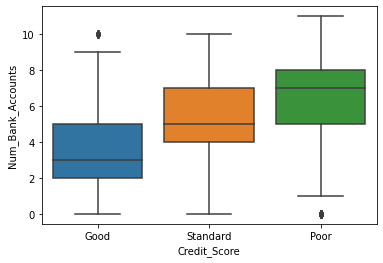

In [181]:
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Credit_Card'>

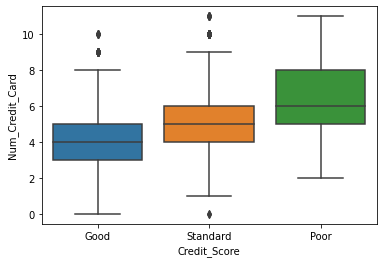

In [182]:
sns.boxplot(x='Credit_Score', y='Num_Credit_Card',data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Interest_Rate'>

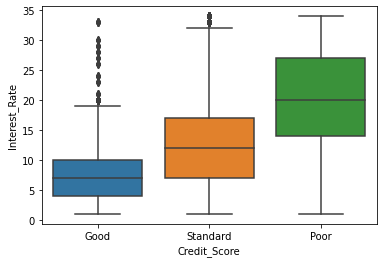

In [183]:
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_of_Loan'>

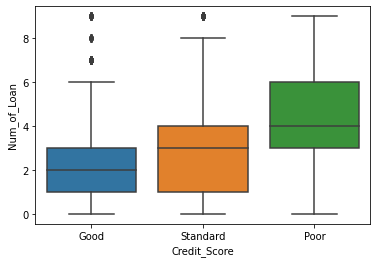

In [184]:
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Delay_from_due_date'>

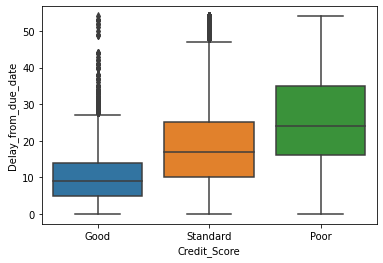

In [185]:
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

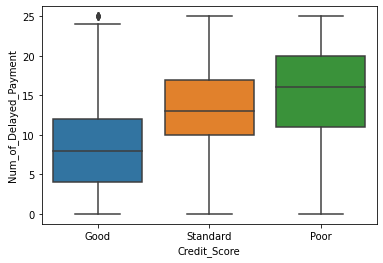

In [186]:
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Outstanding_Debt'>

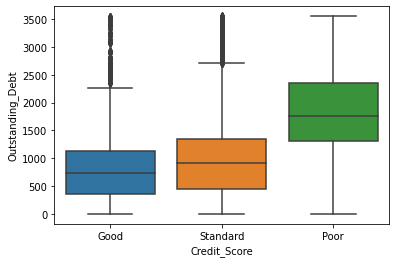

In [187]:
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

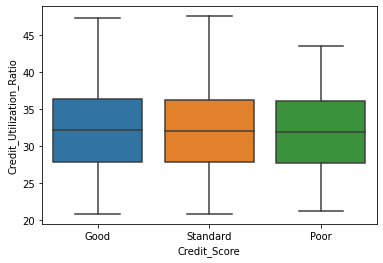

In [188]:
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_History_Age'>

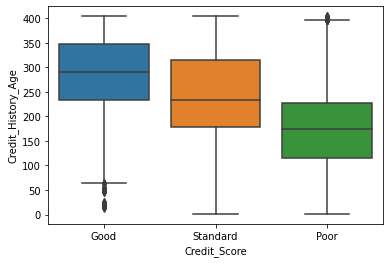

In [189]:
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

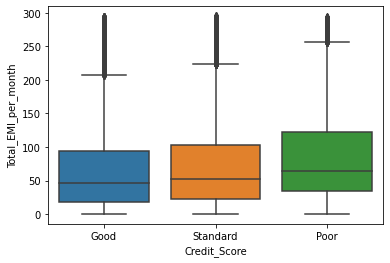

In [190]:
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

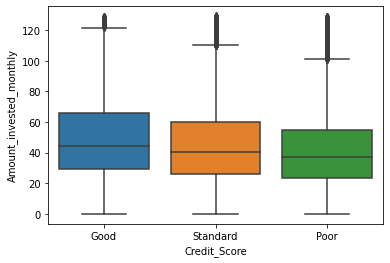

In [191]:
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Balance'>

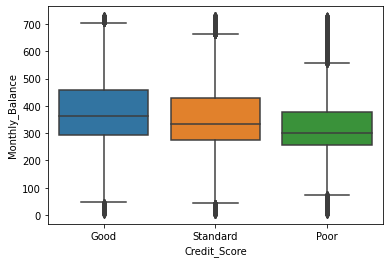

In [192]:
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Age'>

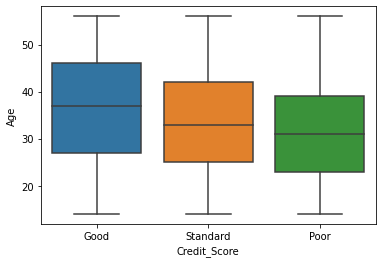

In [193]:
sns.boxplot(x='Credit_Score', y='Age', data=df)

In [194]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72247 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     72247 non-null  int64  
 1   Age                       72247 non-null  float64
 2   Occupation                72247 non-null  object 
 3   Annual_Income             72247 non-null  float64
 4   Monthly_Inhand_Salary     72247 non-null  float64
 5   Num_Bank_Accounts         72247 non-null  float64
 6   Num_Credit_Card           72247 non-null  float64
 7   Interest_Rate             72247 non-null  float64
 8   Num_of_Loan               72247 non-null  float64
 9   Type_of_Loan              72247 non-null  object 
 10  Delay_from_due_date       72247 non-null  float64
 11  Num_of_Delayed_Payment    72247 non-null  float64
 12  Changed_Credit_Limit      72247 non-null  float64
 13  Num_Credit_Inquiries      72247 non-null  float64
 14  Credit_Mix 

In [197]:
cats=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cats.append(i)

In [198]:
cats

['Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [199]:
#Transforming the column in 0, 1, or 2.
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [200]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [201]:
variables=['Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

In [202]:
categoricals=df[['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour','Credit_Score']]

In [203]:
categoricals.head()

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,"auto loan,credit-builder loan,personal loan,ho...",2,No,High_spent_Small_value_payments,Good
1,Scientist,"auto loan,credit-builder loan,personal loan,ho...",2,No,Low_spent_Large_value_payments,Good
2,Scientist,"auto loan,credit-builder loan,personal loan,ho...",2,No,Low_spent_Medium_value_payments,Good
3,Scientist,"auto loan,credit-builder loan,personal loan,ho...",2,No,Low_spent_Small_value_payments,Good
4,Scientist,"auto loan,credit-builder loan,personal loan,ho...",2,No,High_spent_Medium_value_payments,Good


In [204]:
from sklearn.preprocessing import LabelEncoder
for col in categoricals.columns:
    le=LabelEncoder()
    categoricals[col]=le.fit_transform(categoricals[col])
categoricals.head()

<ipython-input-204-e1a08330f52e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals[col]=le.fit_transform(categoricals[col])
<ipython-input-204-e1a08330f52e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals[col]=le.fit_transform(categoricals[col])
<ipython-input-204-e1a08330f52e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,12,102,2,1,2,0
1,12,102,2,1,3,0
2,12,102,2,1,4,0
3,12,102,2,1,5,0
4,12,102,2,1,1,0


In [205]:
y_cat=categoricals['Credit_Score']
x_cat=categoricals.drop(columns=['Credit_Score'])

In [206]:
from sklearn.feature_selection import chi2
chi_scores=chi2(x_cat,y_cat)

Higher the chi values higher the importance, Lower the P values higher the importance

In [207]:
chi_scores

(array([2.98600363e+01, 4.27234727e+05, 7.67920861e+03, 2.23237412e+03,
        8.04090905e+02]),
 array([3.28076783e-007, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.47672876e-175]))

<AxesSubplot:>

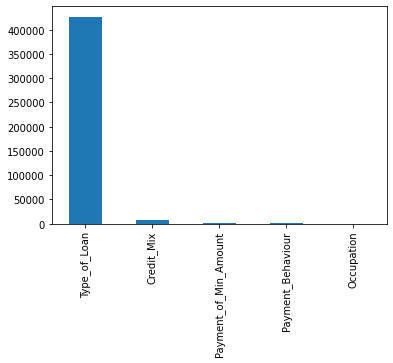

In [208]:
chi_values=pd.Series(chi_scores[0],index=x_cat.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

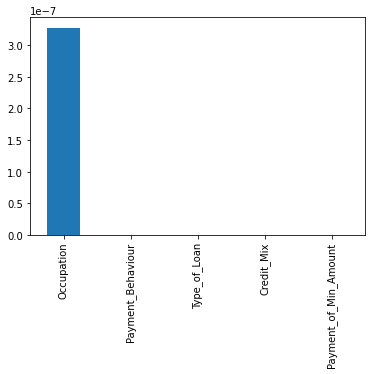

In [209]:
p_values=pd.Series(chi_scores[1],index=x_cat.columns)
p_values.sort_values(ascending=False,inplace=True)

p_values.plot.bar()

In [210]:
cats.remove('Credit_Score')

In [211]:
cont=df.drop(columns=cats,axis=1)

In [212]:
cont.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089,Good
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162,Good
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863,Good
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310,Good
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231,Good


In [213]:
cont['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [214]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
cont['Credit_Score']=lr.fit_transform(cont['Credit_Score'])

<AxesSubplot:>

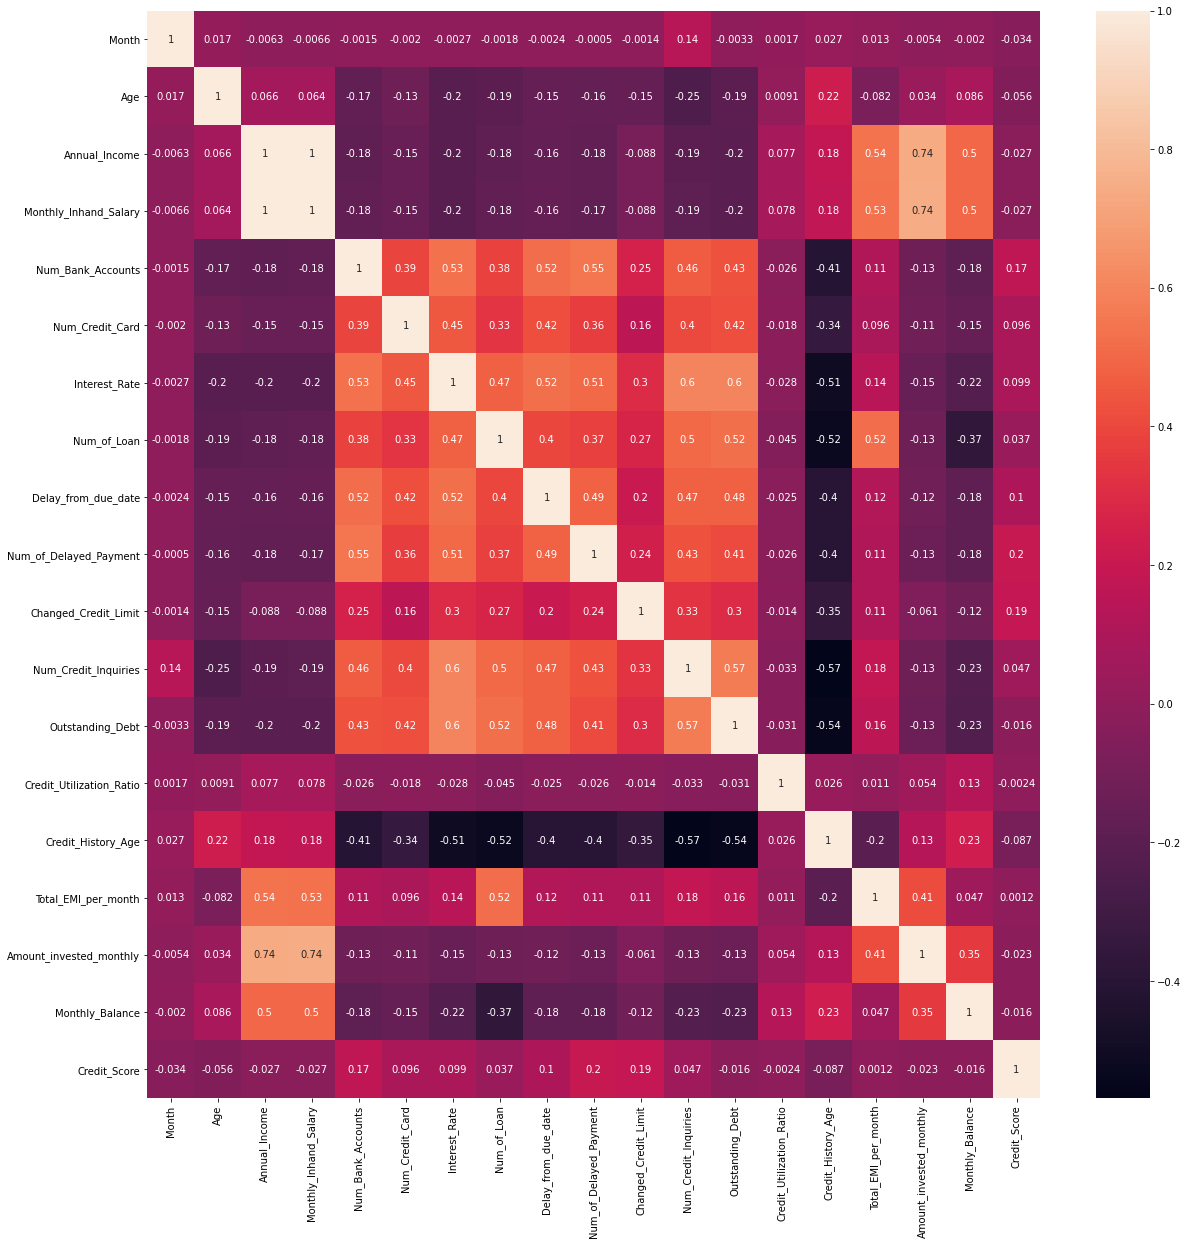

In [215]:
plt.figure(figsize=(20,20))
sns.heatmap(cont.corr(),annot=True)

In [216]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [217]:
corr_features = correlation(cont, 0.7)
len(set(corr_features))

2

In [218]:
corr_features

{'Amount_invested_monthly', 'Monthly_Inhand_Salary'}

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72247 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     72247 non-null  int64  
 1   Age                       72247 non-null  float64
 2   Occupation                72247 non-null  object 
 3   Annual_Income             72247 non-null  float64
 4   Monthly_Inhand_Salary     72247 non-null  float64
 5   Num_Bank_Accounts         72247 non-null  float64
 6   Num_Credit_Card           72247 non-null  float64
 7   Interest_Rate             72247 non-null  float64
 8   Num_of_Loan               72247 non-null  float64
 9   Type_of_Loan              72247 non-null  object 
 10  Delay_from_due_date       72247 non-null  float64
 11  Num_of_Delayed_Payment    72247 non-null  float64
 12  Changed_Credit_Limit      72247 non-null  float64
 13  Num_Credit_Inquiries      72247 non-null  float64
 14  Credit_Mix 

In [220]:
le=LabelEncoder()
df['Occupation']=le.fit_transform(df['Occupation'])


In [221]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [222]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [223]:
len(df['Type_of_Loan'].unique())

4578

In [224]:
df['Type_of_Loan']=le.fit_transform(df['Type_of_Loan'])
df['Payment_Behaviour']=le.fit_transform(df['Payment_Behaviour'])
df['Payment_of_Min_Amount']=le.fit_transform(df['Payment_of_Min_Amount'])


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72247 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     72247 non-null  int64  
 1   Age                       72247 non-null  float64
 2   Occupation                72247 non-null  int32  
 3   Annual_Income             72247 non-null  float64
 4   Monthly_Inhand_Salary     72247 non-null  float64
 5   Num_Bank_Accounts         72247 non-null  float64
 6   Num_Credit_Card           72247 non-null  float64
 7   Interest_Rate             72247 non-null  float64
 8   Num_of_Loan               72247 non-null  float64
 9   Type_of_Loan              72247 non-null  int32  
 10  Delay_from_due_date       72247 non-null  float64
 11  Num_of_Delayed_Payment    72247 non-null  float64
 12  Changed_Credit_Limit      72247 non-null  float64
 13  Num_Credit_Inquiries      72247 non-null  float64
 14  Credit_Mix 

In [226]:
df['Credit_Score']=le.fit_transform(df['Credit_Score'])


In [227]:

y=df['Credit_Score']

In [228]:
x=df.drop(['Credit_Score','Amount_invested_monthly', 'Monthly_Inhand_Salary','Occupation'],axis=1)

In [229]:
from sklearn.model_selection import train_test_split
x_train,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [230]:
x_train.head()

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
26367,8,34.0,59710.88,4.0,5.0,11.0,1.0,3535,18.0,20.0,6.02,1.0,1,36.28,36.476414,264.0,1,41.776485,4,341.348561
56707,4,22.0,18145.22,4.0,3.0,10.0,1.0,1524,3.0,10.0,6.36,2.0,2,1154.49,38.963880,193.0,1,12.843522,4,319.835453
43550,7,26.0,30789.35,5.0,4.0,7.0,4.0,202,5.0,6.0,5.72,6.0,2,1106.11,27.378068,245.0,1,73.865700,0,413.324948
73216,1,43.0,16117.63,6.0,9.0,26.0,2.0,4017,32.0,24.0,7.83,9.0,0,1488.01,27.998673,201.0,0,23.316808,5,322.098905
82,3,40.0,33751.27,5.0,5.0,20.0,3.0,918,16.0,20.0,11.00,8.0,1,1328.93,38.030722,232.0,2,65.008174,3,229.669827


In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [232]:
dec=DecisionTreeClassifier()
dec.fit(x_train,ytrain)


DecisionTreeClassifier()

In [233]:
y_dec=dec.predict(xtest)

In [234]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(ytest,y_dec))
print(confusion_matrix(ytest,y_dec))
print(classification_report(ytest,y_dec))


0.7431141868512111
[[1678  139  703]
 [ 133 2769 1061]
 [ 716  960 6291]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2520
           1       0.72      0.70      0.71      3963
           2       0.78      0.79      0.79      7967

    accuracy                           0.74     14450
   macro avg       0.72      0.72      0.72     14450
weighted avg       0.74      0.74      0.74     14450



In [235]:
ran=RandomForestClassifier()
ran.fit(x_train,ytrain)
y_ran=ran.predict(xtest)


In [236]:
print(accuracy_score(ytest,y_ran))
print(confusion_matrix(ytest,y_ran))
print(classification_report(ytest,y_ran))

0.8399307958477509
[[2055   11  454]
 [  41 3288  634]
 [ 479  694 6794]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2520
           1       0.82      0.83      0.83      3963
           2       0.86      0.85      0.86      7967

    accuracy                           0.84     14450
   macro avg       0.83      0.83      0.83     14450
weighted avg       0.84      0.84      0.84     14450

